## Exploratory Data Analysis on Used Cars Datset

In [ ]:
pip install opendatasets --upgrade --quiet

- libraries for plotting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Downloading the data now

In [ ]:
import opendatasets as od

data_url="https://www.kaggle.com/austinreese/craigslist-carstrucks-data"

od.download(data_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: anshalsingh
Your Kaggle Key: ··········


  2%|▏         | 5.00M/267M [00:00<00:08, 33.6MB/s]

100%|██████████| 267M/267M [00:03<00:00, 90.8MB/s]


In [ ]:
data_filename='./craigslist-carstrucks-data/vehicles.csv'

## Data preparation and cleaning

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(data_filename)

In [ ]:
df.head(3)
#dropped an unnamed column

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600


In [ ]:
df.shape

(458213, 26)

- only Numeric columns

In [ ]:
import numpy as np
print(df.select_dtypes(include=[np.number]).dtypes)

Unnamed: 0      int64
id              int64
price           int64
year          float64
odometer      float64
lat           float64
long          float64
dtype: object


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [ ]:
df.describe()

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [ ]:
df.nunique()

Unnamed: 0      458213
id              458213
url             458213
region             405
region_url         413
price            16924
year               110
manufacturer        43
model            31520
condition            6
cylinders            8
fuel                 5
odometer        108135
title_status         6
transmission         3
VIN             133620
drive                3
size                 4
type                13
paint_color         12
image_url       285404
description     384347
state               51
lat              61179
long             61559
posting_date    423805
dtype: int64

# Percentage missing values per column

In [ ]:
missing_val=df.isnull().sum().sort_values(ascending=False)/len(df)
missing_val

size            0.701307
condition       0.421071
VIN             0.409305
cylinders       0.373494
paint_color     0.307375
drive           0.292851
type            0.246038
odometer        0.120693
manufacturer    0.039763
lat             0.016254
long            0.016254
model           0.010576
fuel            0.007064
title_status    0.005624
transmission    0.005329
year            0.002292
description     0.000153
posting_date    0.000061
image_url       0.000061
state           0.000000
price           0.000000
region_url      0.000000
region          0.000000
url             0.000000
id              0.000000
Unnamed: 0      0.000000
dtype: float64

#Graph of missing values that are not zero
- Also getting the type of missing_val

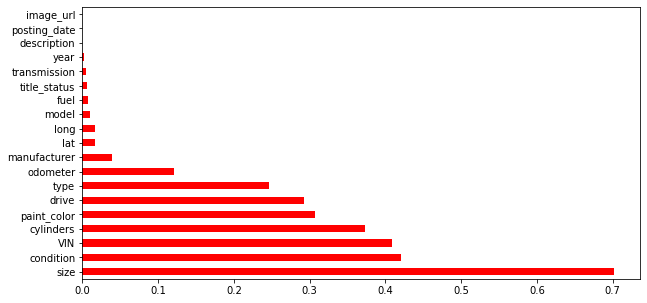

In [ ]:
plt.figure(figsize=(10,5))
missing_val[missing_val!=0].plot(kind='barh',color="red")
plt.show()

In [ ]:
type(missing_val)

pandas.core.series.Series

##Exploratory Data Analysis
### Use the columns:(by alooking at the dataset)
- Craiglist region
- Entry Price
- Entry year
- Manufacturer of vehicle
- Condition of vehicle
- Latitude and Longitude

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

## Region Column

In [ ]:
df.region

0          auburn
1          auburn
2          auburn
3          auburn
4          auburn
           ...   
458208     wausau
458209     wausau
458210    wyoming
458211    wyoming
458212    wyoming
Name: region, Length: 458213, dtype: object

In [ ]:
#Unique no of regions
un_region=df.region.unique()
len(un_region)

405

- Listing **according** to the region

In [ ]:
region_by_no=df.region.value_counts()
region_by_no

columbus               3818
rochester              3592
jacksonville           3504
springfield            3293
fayetteville           2990
                       ... 
siskiyou county          28
susanville               17
fort smith, AR           11
west virginia (old)      11
sioux city, IA            1
Name: region, Length: 405, dtype: int64

In [ ]:
#top 20
region_by_no[:21]

columbus                    3818
rochester                   3592
jacksonville                3504
springfield                 3293
fayetteville                2990
bend                        2989
spokane / coeur d'alene     2988
fresno / madera             2988
redding                     2987
stockton                    2987
inland empire               2987
omaha / council bluffs      2986
modesto                     2985
ventura county              2984
oklahoma city               2984
salem                       2984
des moines                  2984
eugene                      2983
kennewick-pasco-richland    2983
las vegas                   2981
tucson                      2979
Name: region, dtype: int64

In [ ]:
#Type of data
type(region_by_no)

pandas.core.series.Series

- Plot a graph displying the same

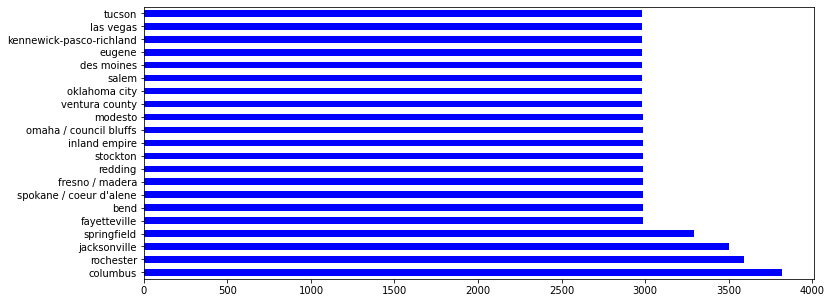

In [ ]:
plt.figure(figsize=(12,5))
region_by_no[:21].plot(kind='barh',color="blue")
plt.show()

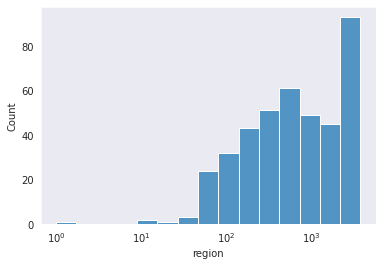

In [ ]:
sns.set_style('dark')

sns.histplot(region_by_no,log_scale=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


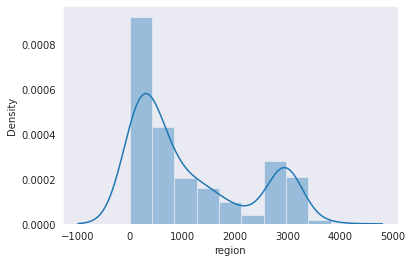

In [ ]:
sns.distplot(region_by_no)
plt.show()

In [ ]:
region_by_no[region_by_no==1]

sioux city, IA    1
Name: region, dtype: int64

- High and Low no regions

In [ ]:
high_reg=region_by_no[region_by_no>=1000]

In [ ]:
#Percentage of higer ones
len(high_reg)/len(un_region)

0.4

In [ ]:
low_reg=region_by_no[region_by_no<1000]

In [ ]:
#percentage of lower ones
len(low_reg)/len(un_region)

0.6

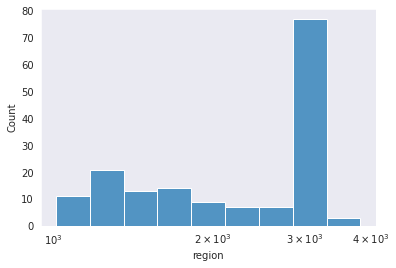

In [ ]:
sns.histplot(high_reg,log_scale=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


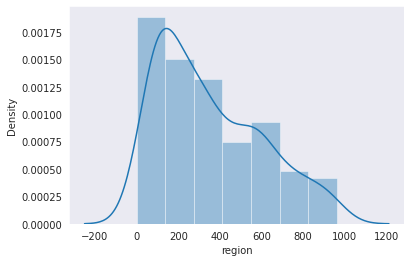

In [ ]:
sns.distplot(low_reg)

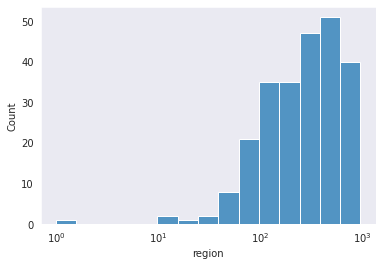

In [ ]:
sns.histplot(low_reg,log_scale=True)

In [ ]:
"New York" in df.region

False

## Entry price

In [ ]:
df.price

0         35990
1          7500
2          4900
3          2000
4         19500
          ...  
458208    14995
458209    17895
458210    17900
458211     1300
458212    22900
Name: price, Length: 458213, dtype: int64

In [ ]:
un_price=df.price.unique()
len(un_price)
#no of different pice values

16924

- Pricing according to the regions

In [ ]:
diff_prices=df.price.value_counts()
diff_prices

0        33753
6995      4003
5995      3760
7995      3701
3500      3680
         ...  
29577        1
13185        1
15232        1
33431        1
12422        1
Name: price, Length: 16924, dtype: int64

In [ ]:
diff_prices[:11]
#top 10 costliest

0       33753
6995     4003
5995     3760
7995     3701
3500     3680
9995     3561
4500     3414
8995     3405
2500     3288
5500     3147
4995     3073
Name: price, dtype: int64

- plots depending upon prices

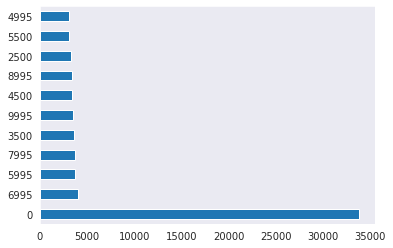

In [ ]:
diff_prices[:11].plot(kind='barh')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


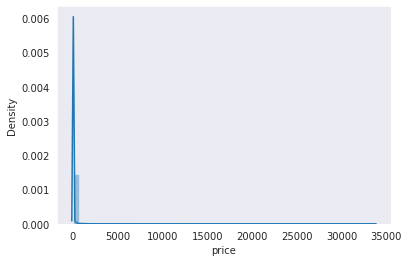

In [ ]:
sns.distplot(diff_prices)
plt.show()

In [ ]:
np.mean(df.price)

40420.93069598637

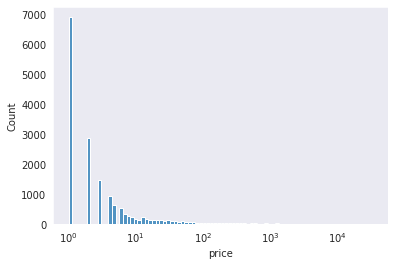

In [ ]:
sns.histplot(diff_prices,log_scale=True)
plt.show()

In [ ]:
#Expensive ones
exp_price=diff_prices[diff_prices>=10000]
len(exp_price)

1

In [ ]:
#Affordable ones
aff_price=diff_prices[diff_prices<4500]
len(aff_price)

16923

## Entry Year

In [ ]:
df.year

0         2010.0
1         2014.0
2         2006.0
3         1974.0
4         2005.0
           ...  
458208    2014.0
458209    2018.0
458210    2014.0
458211    2008.0
458212    2008.0
Name: year, Length: 458213, dtype: float64

In [ ]:
print(np.min(df.year))
print(np.max(df.year))

1900.0
2021.0


In [ ]:
#No of unique years
un_year=df.year.unique()
len(un_year)

111

- Listing over the years

In [ ]:
diff_years=df.year.value_counts()
diff_years

2017.0    42405
2014.0    34243
2013.0    33392
2015.0    32609
2016.0    31966
          ...  
1921.0        1
1913.0        1
1922.0        1
1910.0        1
1919.0        1
Name: year, Length: 110, dtype: int64

In [ ]:
np.max(diff_years)

42405

[]

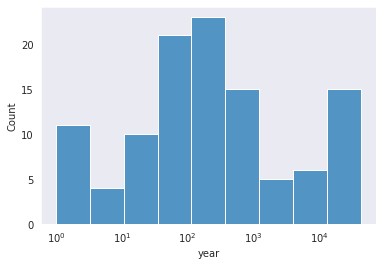

In [ ]:
sns.histplot(diff_years,log_scale=True)
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

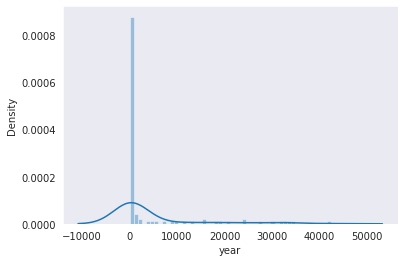

In [ ]:
sns.distplot(diff_years)
plt.plot()

## Manufacturer of the Vehicle

In [ ]:
df.manufacturer

0         chevrolet
1           hyundai
2               bmw
3         chevrolet
4              ford
            ...    
458208     cadillac
458209      hyundai
458210     cadillac
458211         jeep
458212          NaN
Name: manufacturer, Length: 458213, dtype: object

In [ ]:
#No of manufacturers
un_manu=df.manufacturer.unique()
len(un_manu)

44

In [ ]:
diff_manu=df.manufacturer.value_counts()
diff_manu

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


In [ ]:
type(diff_manu)

pandas.core.series.Series

- Graphs according to manufacturers

[]

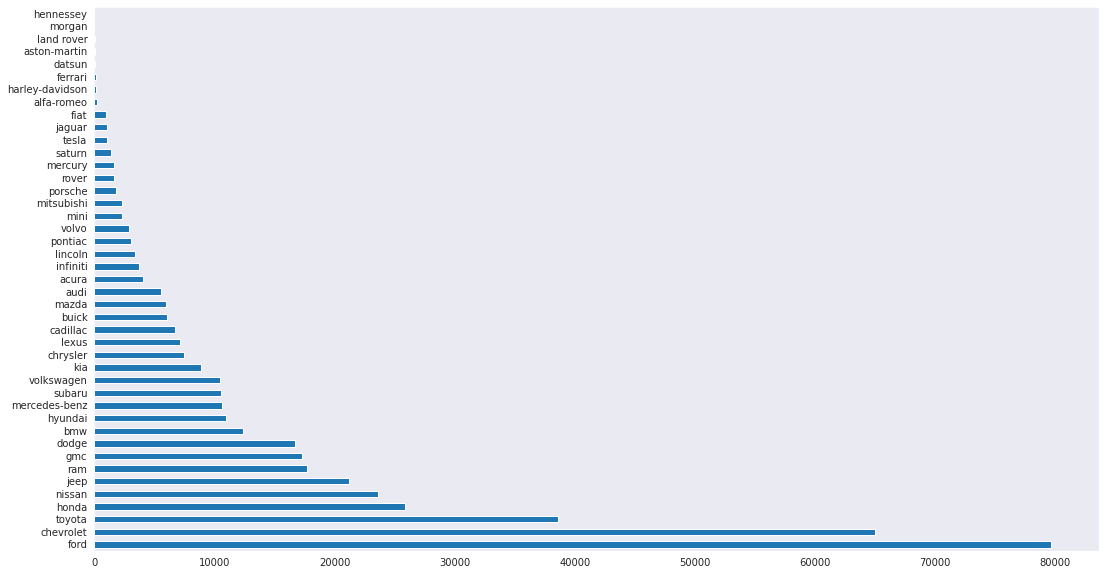

In [ ]:
plt.figure(figsize=(18,10))
diff_manu.plot(kind='barh')
plt.plot()

[]

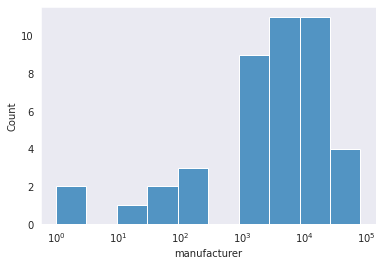

In [ ]:
sns.histplot(diff_manu,log_scale=True)
plt.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

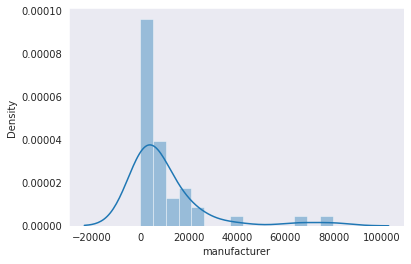

In [ ]:
sns.distplot(diff_manu)
plt.plot()

In [ ]:
high_manu=diff_manu[diff_manu>=2000]
len(high_manu)/len(un_manu)

0.6363636363636364

In [ ]:
low_manu=diff_manu[diff_manu<2000]
len(low_manu)/len(un_manu)

0.3409090909090909

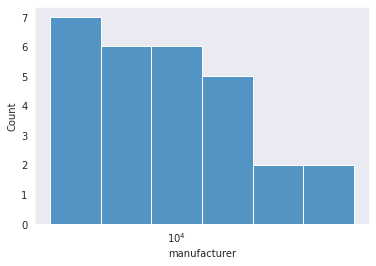

In [ ]:
sns.histplot(high_manu,log_scale=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


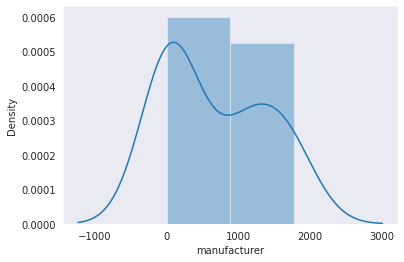

In [ ]:
sns.distplot(low_manu)

## Condition of Vehicle

In [ ]:
df.condition

0              good
1         excellent
2              good
3              good
4         excellent
            ...    
458208    excellent
458209    excellent
458210    excellent
458211         good
458212          NaN
Name: condition, Length: 458213, dtype: object

In [ ]:
un_cond=df.condition.unique()
len(un_cond)

7

In [ ]:
diff_cond=df.condition.value_counts()
diff_cond

good         115685
excellent    115206
like new      24553
fair           7740
new            1428
salvage         661
Name: condition, dtype: int64

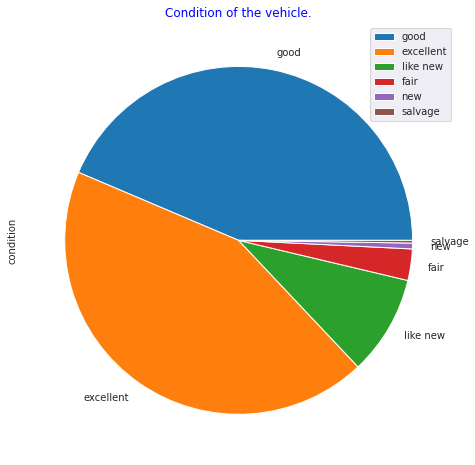

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Condition of the vehicle.",color='blue')
diff_cond.plot(kind='pie')
plt.legend()
plt.show()


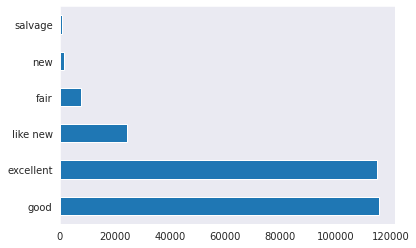

In [ ]:
diff_cond.plot(kind='barh')
plt.show()

## Latitude and Longitude

In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

- Remove the missing values 

In [ ]:
df.lat.isnull().sum()

7448

In [ ]:
df.lat.shape

(458213,)

In [ ]:
x=df.lat.dropna(axis=0)
print(x.shape)

(450765,)


In [ ]:
df.long.isnull().sum()

7448

In [ ]:
df.long.shape

(458213,)

In [ ]:
y=df.long.dropna(axis=0)
print(y.shape)

(450765,)


In [ ]:
x

0         32.590000
1         32.547500
2         32.616807
3         32.861600
4         32.547500
            ...    
458208    44.408867
458209    44.408867
458210    44.784900
458211    44.773500
458212    42.117656
Name: lat, Length: 450765, dtype: float64

In [ ]:
y

0         -85.480000
1         -85.468200
2         -85.464149
3         -85.216100
4         -85.468200
             ...    
458208    -89.881210
458209    -89.882240
458210   -106.964800
458211   -106.939600
458212    -88.436954
Name: long, Length: 450765, dtype: float64

[]

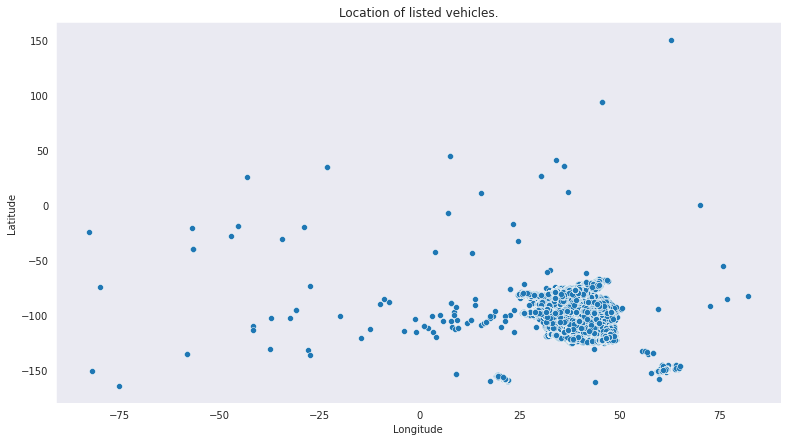

In [ ]:
plt.figure(figsize=(13,7))
plt.title("Location of listed vehicles.")
sns.scatterplot(x=x,y=y)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.plot()

- Will try to plot these on a Map

In [ ]:
import folium

In [ ]:
lat,lon=df.lat[0],df.long[0]
lat,lon

(32.59, -85.48)

In [145]:
#First position only
map=folium.Map(width=800,height=500)

marker=folium.Marker((lat,lon))
marker.add_to(map)
map


- As a heatmap on the map

In [ ]:
from folium import plugins
from folium.plugins import HeatMap

## Heatmap of latitud and longitudes on Map

In [ ]:
sample_df=df.sample(int(0.01*len(x)))

lat_lon_pairs=list(zip(list(x),list(y)))

In [146]:
map=folium.Map(zoom_start=20,tiles="Stamen Terrain")
HeatMap(lat_lon_pairs[:1000]).add_to(map)

map

## Summary and Conclusion
1. Region
- After Springfield every region seems to report almost the same value 
- Quite a few regions with non existent values
- 60% of the regions have value lower than 1000
- A high number of higher regions seem to be concentrated in a certain range only
- The dataset seems to have a no of big regions missing

2. Entry prices
- There seems to be one very high mrp and then theyy become more consitent
- Only 1 listing higher than 10k price.

3. Entry year
- Starts from 1900 and till 2021(current)
- Spread over 111 years
- The year '2017' has the maximum no of listings

4. Manufacturers
- 44 different manufacturers
- Ford has the maximum no of listings

5. Condition of vehicle
- There are 6 conditions in which vehicle are listed
- Most of the vehicles are in good or excellent condition

6. Latitude and Longitudes
- Looking at heatmap it seems to have no of outliers